In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import itertools
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pylab import rcParams

In [2]:
data = pd.read_csv('Final.csv')
print(data.dtypes)
data

UserName            object
ProductName         object
ProductType         object
TransactionType     object
Amount             float64
CashBacks          float64
TransactionDate     object
TransactionTime     object
dtype: object


,UserName,ProductName,ProductType,TransactionType,Amount,CashBacks,TransactionDate,TransactionTime
0,Nicholas Rose,CrazyLivelyHood.com,Paysite,Sales,97.56,NaN,2020-01-30,0:00
1,NaN,CrazyLivelyHood.com,Paysite,Sales,120.15,NaN,2020-01-30,1:00
2,Nicholas Rose,CrazyLivelyHood.com,Paysite,Sales,4.46,NaN,2020-01-31,2:00
3,Dustin Dixon,CrazyLivelyHood.com,Paysite,Sales,6.22,NaN,2020-01-31,3:00
4,NaN,CrazyLivelyHood.com,Paysite,Sales,57.30,NaN,2020-01-31,4:00
...,...,...,...,...,...,...,...,...
198,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN,2020-01-31,6:00
199,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN,2020-02-07,7:00
200,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN,2020-02-14,8:00
201,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN,2020-02-21,9:00


In [3]:
data = pd.read_csv('Final.csv', parse_dates=[['TransactionDate','TransactionTime']], index_col='TransactionDate_TransactionTime')
print(data.dtypes)
data['Amount'] = data['Amount'].fillna(0)
data

UserName            object
ProductName         object
ProductType         object
TransactionType     object
Amount             float64
CashBacks          float64
dtype: object


,UserName,ProductName,ProductType,TransactionType,Amount,CashBacks
TransactionDate_TransactionTime,,,,,,
2020-01-30 00:00:00,Nicholas Rose,CrazyLivelyHood.com,Paysite,Sales,97.56,NaN
2020-01-30 01:00:00,NaN,CrazyLivelyHood.com,Paysite,Sales,120.15,NaN
2020-01-31 02:00:00,Nicholas Rose,CrazyLivelyHood.com,Paysite,Sales,4.46,NaN
2020-01-31 03:00:00,Dustin Dixon,CrazyLivelyHood.com,Paysite,Sales,6.22,NaN
2020-01-31 04:00:00,NaN,CrazyLivelyHood.com,Paysite,Sales,57.30,NaN
...,...,...,...,...,...,...
2020-01-31 06:00:00,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN
2020-02-07 07:00:00,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN
2020-02-14 08:00:00,Francisco Sanchez,CthuluhsSpawn.com,Freemium,Sales,20.00,NaN


In [4]:
data.index

DatetimeIndex(['2020-01-30 00:00:00', '2020-01-30 01:00:00',
               '2020-01-31 02:00:00', '2020-01-31 03:00:00',
               '2020-01-31 04:00:00', '2020-02-01 05:00:00',
               '2020-02-01 06:00:00', '2020-02-01 07:00:00',
               '2020-02-02 08:00:00', '2020-02-02 09:00:00',
               ...
               '2020-03-01 01:00:00', '2020-02-15 02:00:00',
               '2020-02-17 03:00:00', '2020-02-23 04:00:00',
               '2020-02-26 05:00:00', '2020-01-31 06:00:00',
               '2020-02-07 07:00:00', '2020-02-14 08:00:00',
               '2020-02-21 09:00:00', '2020-02-28 10:00:00'],
              dtype='datetime64[ns]', name='TransactionDate_TransactionTime', length=203, freq=None)

In [5]:
#data.drop(data[data['TransactionType'] == 'Cashback'].index, inplace = True) 
#data

In [6]:
ts = data['Amount']
ts.head(203)

TransactionDate_TransactionTime
2020-01-30 00:00:00     97.56
2020-01-30 01:00:00    120.15
2020-01-31 02:00:00      4.46
2020-01-31 03:00:00      6.22
2020-01-31 04:00:00     57.30
                        ...  
2020-01-31 06:00:00     20.00
2020-02-07 07:00:00     20.00
2020-02-14 08:00:00     20.00
2020-02-21 09:00:00     20.00
2020-02-28 10:00:00     20.00
Name: Amount, Length: 203, dtype: float64

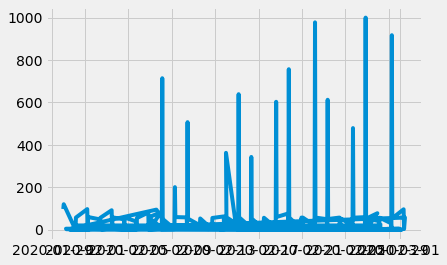

In [7]:
plt.plot(ts)
plt.show()

<AxesSubplot:xlabel='TransactionDate_TransactionTime'>

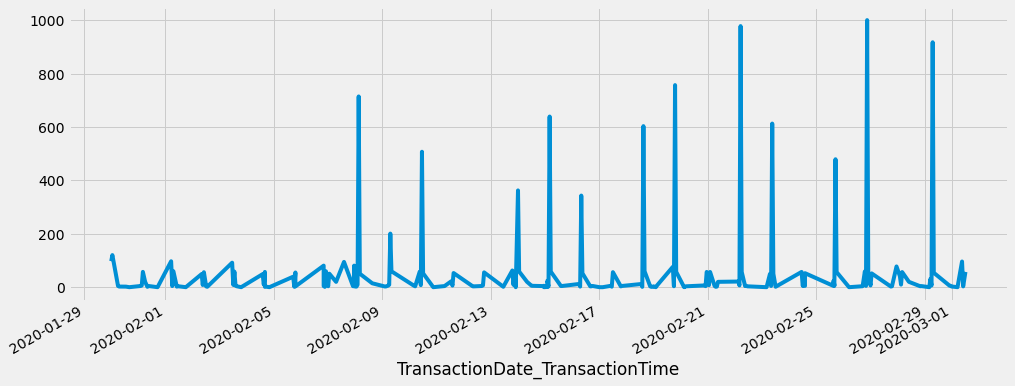

In [8]:
ts.rolling(window=1).mean().plot(figsize=(15, 6))

TransactionDate_TransactionTime
2020-01-30 00:00:00     97.56
2020-01-30 01:00:00    120.15
2020-01-30 06:00:00      4.65
2020-01-30 07:00:00      2.35
2020-01-30 13:00:00      2.05
                        ...  
2020-03-01 05:00:00      0.00
2020-03-01 09:00:00     96.13
2020-03-01 10:00:00      3.01
2020-03-01 11:00:00     30.98
2020-03-01 12:00:00     57.19
Name: Amount, Length: 203, dtype: float64


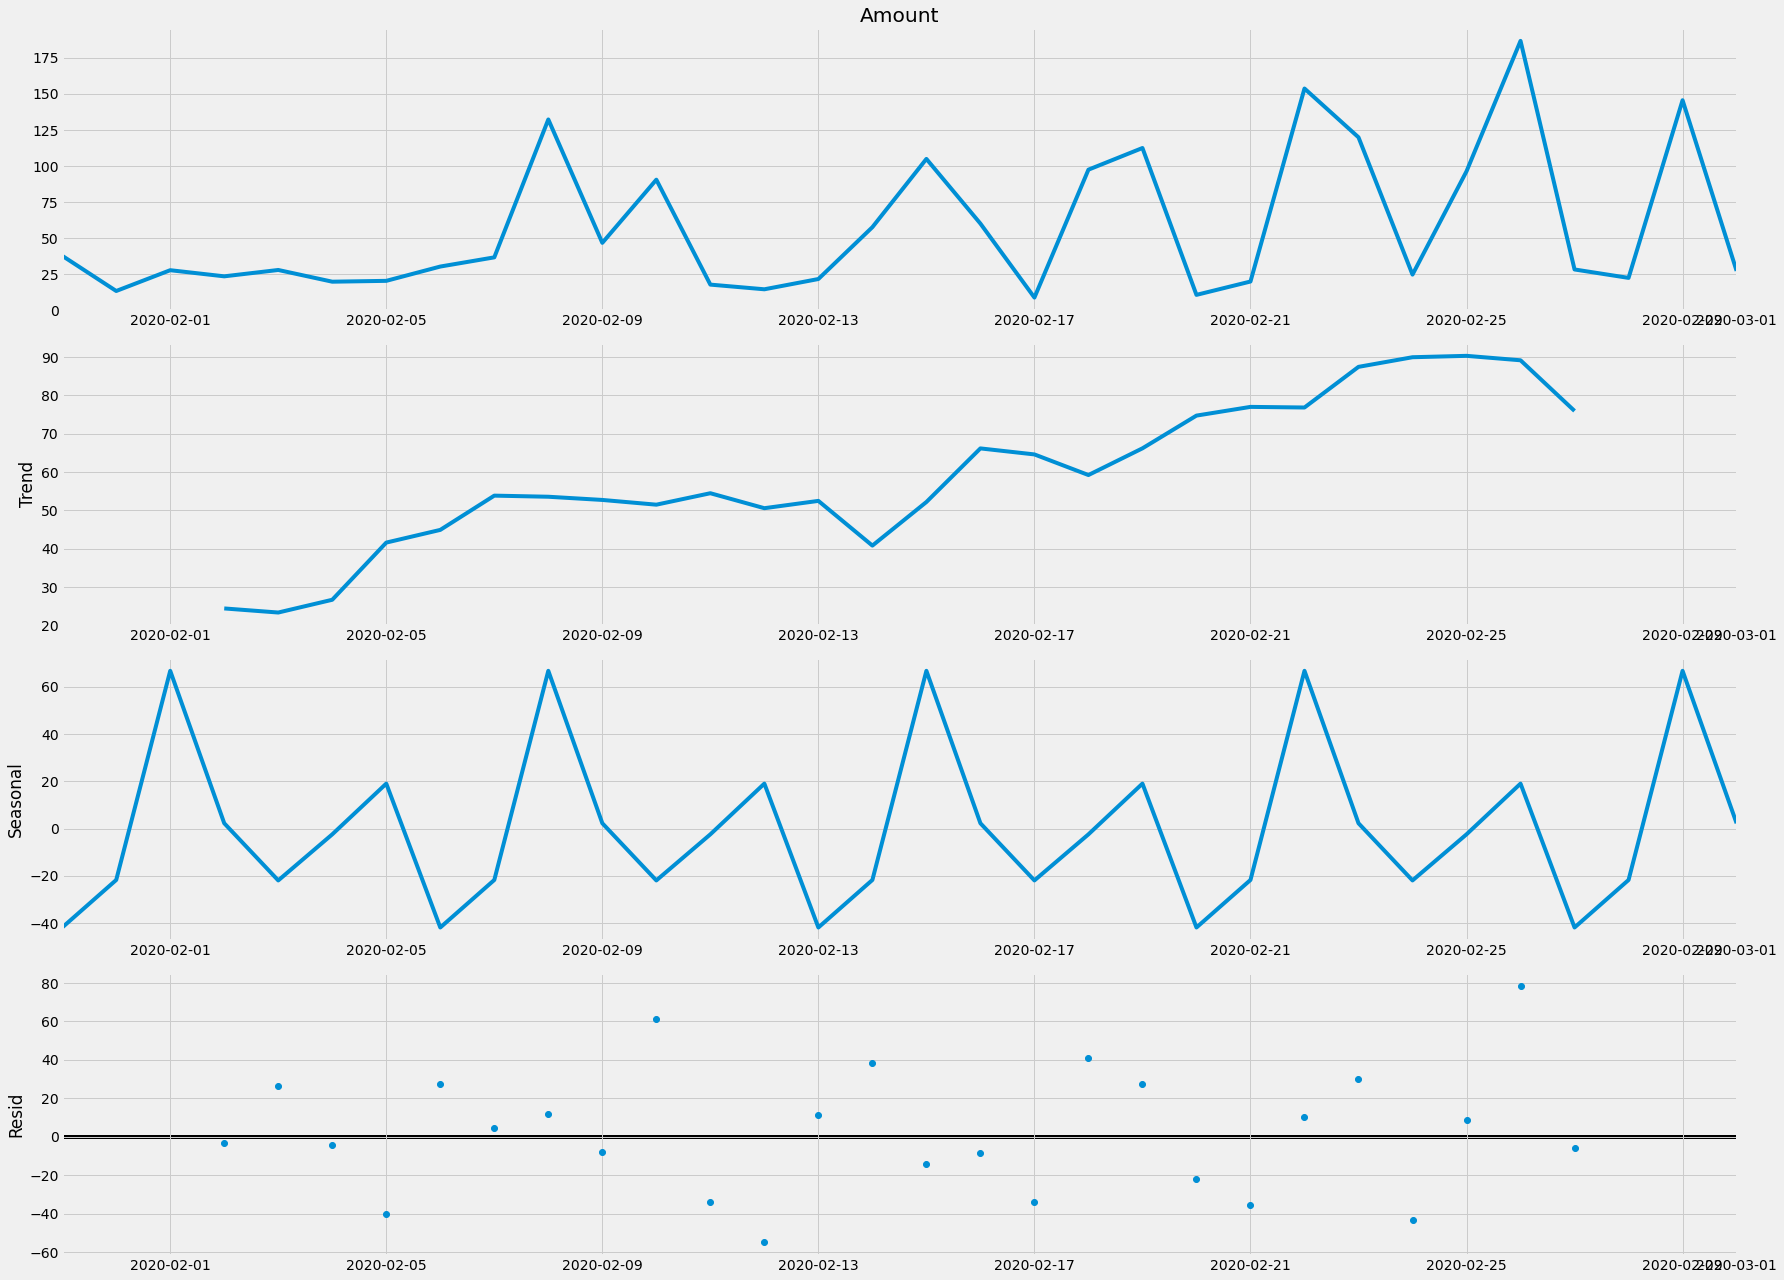

In [9]:
ts.sort_index(inplace=True)
ts['2020':]
print(ts)


# Resampled to everyday frequency as it reqires minimum 24 entries
y = ts.resample('D').mean()
#To obtain sales in year 2020
y['2020':]


# For trend,seasonality, and noise

rcParams['figure.figsize'] = 25, 18
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()






In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:358.7810474205431
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:226.4658139098538
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:219.132016606968
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:85.52126548241066
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:231.35631519933148


/Users/monalgosai/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:223.0412050570338
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:97.17263069344213
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:87.42373118265509
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:338.28937297212116
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:207.29643334051644
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:210.65941799331563
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:76.78264168999458
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:225.60028759825917
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:207.57205659158103
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:96.56103975145287
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:76.49355400533567
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:341.9156915166502
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:212.46426908539226
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:221.10003574649332
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:78.9559532496632
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:222.8527874357515
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:213.60289974447093
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:84.79322042157665
ARI

In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False, error='ignore')

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1547      0.260     -0.595      0.552      -0.665       0.355
ma.L1         -1.0000      0.814     -1.228      0.219      -2.596       0.596
ar.S.L12      -0.6011      0.555     -1.084      0.279      -1.688       0.486
sigma2      3112.2727      0.000   1.19e+07      0.000    3112.272    3112.273


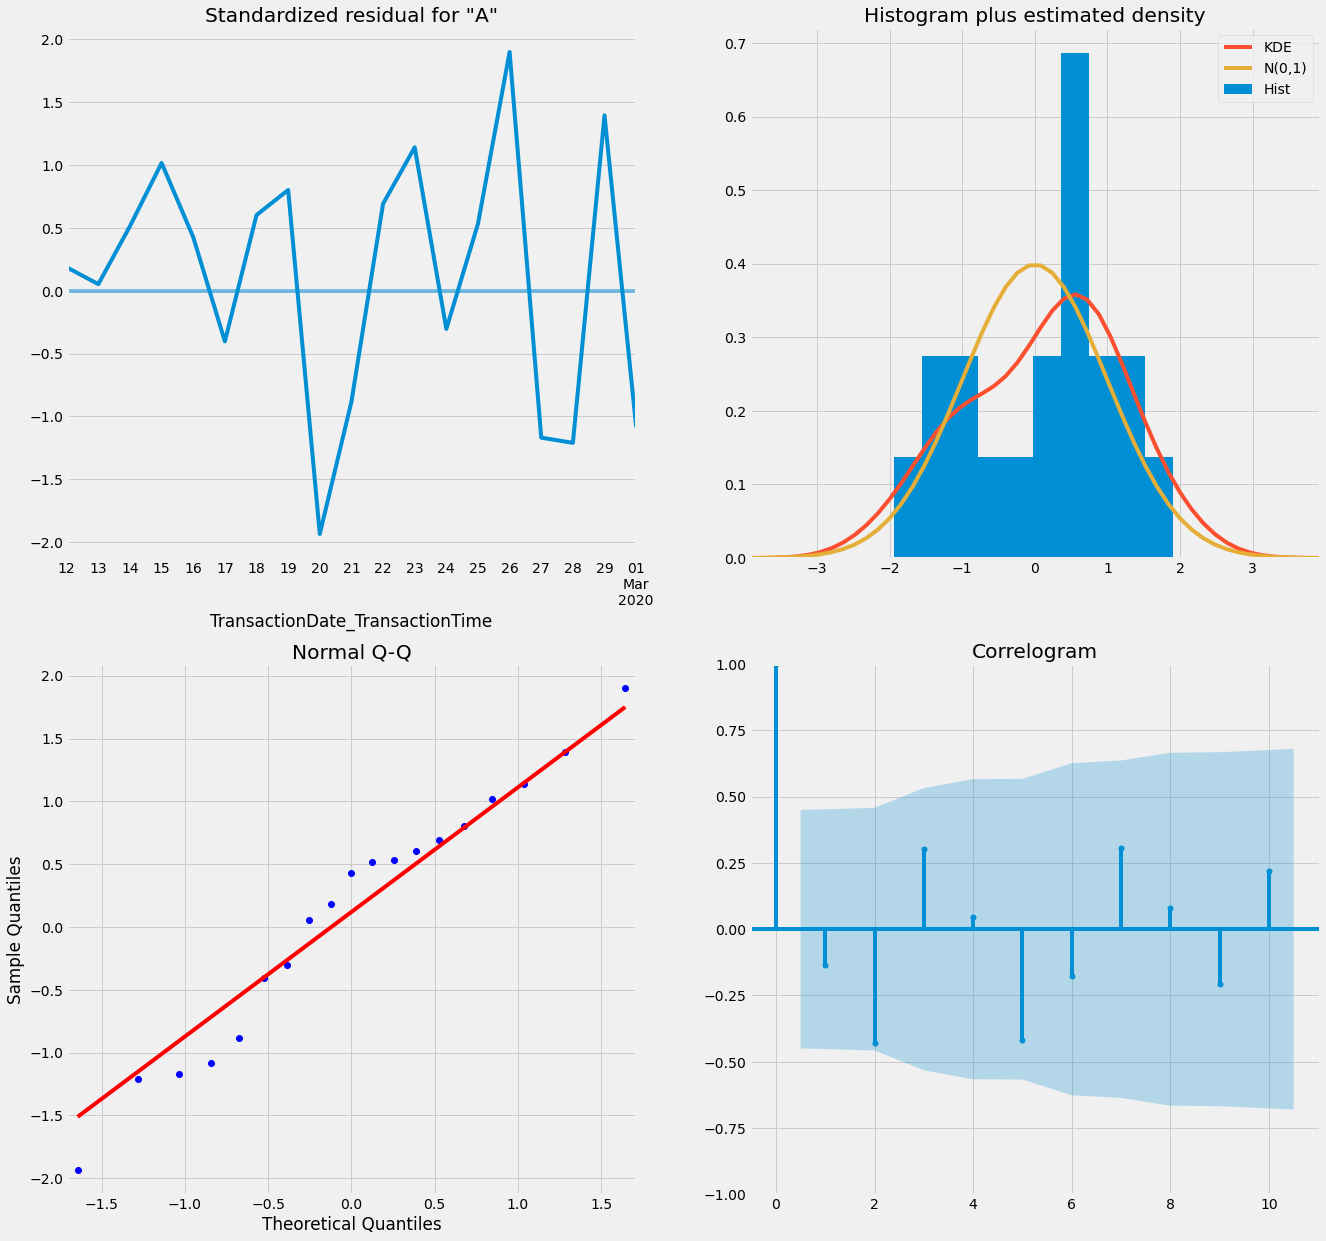

In [13]:
results.plot_diagnostics(figsize=(20, 20))
plt.show()

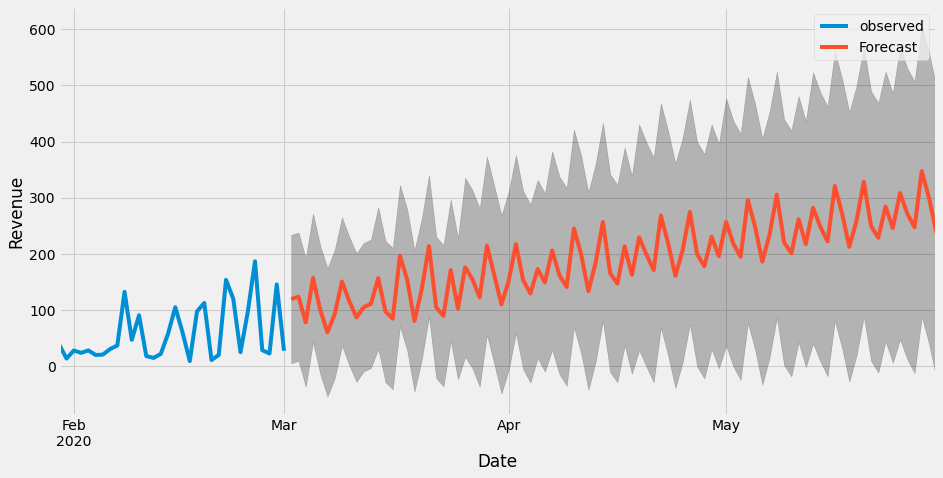

In [15]:
#Forcasting sales on CrazyLivelyHood.com for next two months

pred_uc = results.get_forecast(steps=90)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()